In [1]:
import pandas as pd
# import sklearn
import numpy as np
import matplotlib.pyplot as plt
import h5py
import torch

import pytest

from dataset import TimeSeriesDataSet


from torch.utils.data import Dataset, DataLoader

In [29]:
dataset = TimeSeriesDataSet.from_matlab(mat_path='data/data.mat',
                                        train_size=100,
                                        skip_size=20, 
                                        valid_size=30, 
                                        size=None)

Loading: askRate ...
Loading: askSize ...
Loading: bidRate ...
Loading: bidSize ...
Loading: y ...


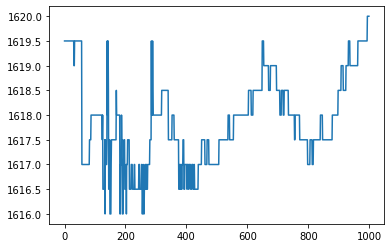

In [30]:
plt.plot(np.arange(1000), dataset.features[:1000, 0])

In [31]:
max_values, max_indices = torch.max(dataset.features, dim=0)
min_values, min_indices = torch.min(dataset.features, dim=0)

print('MAX', max_values, max_indices)
print('MIN', min_values, min_indices)

print(dataset.features[261, 0])

MAX tensor([1709.0000, 1709.5000, 1710.0000, 1710.5000, 1711.0000, 1711.5000,
        1712.0000, 1712.5000, 1713.0000, 1713.5000, 1714.0000, 1714.5000,
        1715.0000, 1715.5000, 1716.0000,  404.0000,  405.0000,  405.0000,
         455.0000,  571.0000,  621.0000,  668.0000,  668.0000,  667.0000,
         674.0000,  674.0000,  674.0000,  674.0000,  674.0000,  672.0000,
        1708.5000, 1708.0000, 1707.5000, 1707.0000, 1706.5000, 1706.0000,
        1705.5000, 1705.0000, 1704.5000, 1704.0000, 1703.5000, 1703.0000,
        1702.5000, 1702.0000, 1701.0000,  964.0000,  965.0000,  965.0000,
         965.0000,  967.0000,  394.0000,  539.0000,  548.0000,  546.0000,
         545.0000,  537.0000,  602.0000,  533.0000,  483.0000,  483.0000]) tensor([2293531, 2293531, 2293531, 2293531, 2293531, 2293531, 2293531, 2293531,
        2293531, 2293531, 2293531, 2293531, 2293531, 2293531, 2293531,  531673,
         531682,  531465,  532011,  405394,  408685, 2264971, 2264976, 2266392,
        2266823

In [32]:
X = dataset.features.numpy()
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))


In [49]:
vals, counts = torch.unique(dataset.features[:, 0], return_counts=True, sorted=True)
dataset.features[:, 0].max()

tensor(1709.)

In [34]:
import seaborn as sns

In [52]:
def plot_feature_counts(n):
    df = pd.DataFrame({f'feature_{n}': dataset.features[:, n]})
    return sns.countplot(x=f'feature_{n}', data=df)

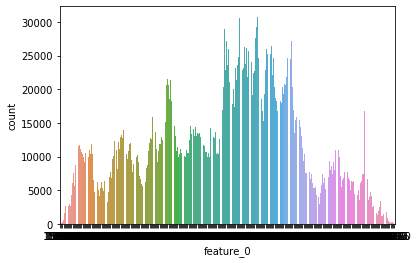

In [53]:
plot_feature_counts(0)

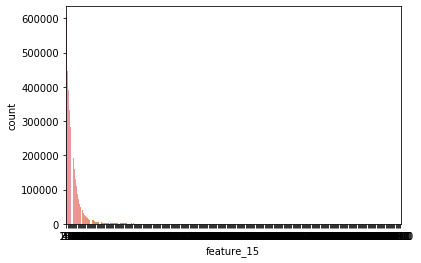

In [55]:
plot_feature_counts(15)

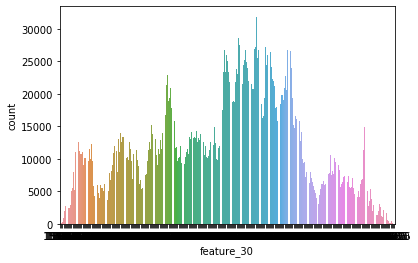

In [56]:
plot_feature_counts(30)

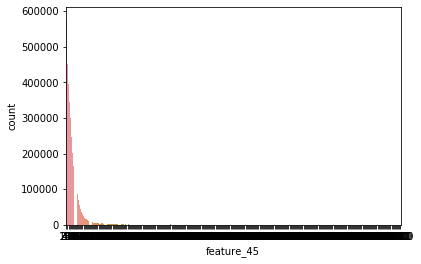

In [57]:
plot_feature_counts(45)